#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Eyal Michaeli

**Student ID**: 207380528

**Date**: 02.04.22

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


## Answer - problem 1

### Section 1

Given that $\Sigma = I_9$, we know that for each pair in $Z_1,..., Z_9$, they are pair-wise independent (for every $Z_i, Z_j, i \neq j$)

For $Z_1 + Z_2 + Z_3 + Z_4$ to be independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ we need to prove:
</br>
$Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 0$. <br>

Let's try to open the covariance expression:
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = Cov(Z_1, Z_1) + Cov(Z_1, Z_2) -Cov(Z_1, Z_3) - Cov(Z_1, Z_4) - Cov(Z_1, Z_5) + Cov(Z_2, Z_1) + Cov(Z_2, Z_2) -Cov(Z_2, Z_3) - Cov(Z_2, Z_4) - Cov(Z_2, Z_5) + Cov(Z_3, Z_1) + Cov(Z_3, Z_2) -Cov(Z_3, Z_3) - Cov(Z_3, Z_4) - Cov(Z_3, Z_5) + Cov(Z_4, Z_1) + Cov(Z_4, Z_2) -Cov(Z_4, Z_3) - Cov(Z_4, Z_4) - Cov(Z_4, Z_5) 
$$

But we already know that the pairs are pair-wise independent, we also know that $$cov(x, x) = var(x)$$ we get:

$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 1 + 0 - 0 - 0 - 0 +0 + 1 - 0 - 0 - 0 + 0 + 0 - 1 - 0 - 0 + 0 + 0 + 0 - 1 - 0 = 0
$$

### Section 2

Given non-random matrices $A$, $B$, we know that $Cov(AX, BY) = A Cov(X,Y) B^T$. <br>
So, $Cov(X,Y) = Cov(AZ, BZ) = A Cov(Z,Z) B^T = A Var(Z) B^T$ 
</br>
Let's check if $X$, $Y$ are independent: 
$$ Cov(X,Y) = 0 $$
$$A Var(Z) B^T = 0 $$

-->
We also know that $Var(Z) = I$. So, the conditions are:
1. $A, B \in \reals^{n \times n} $
2. $A Var(Z) = A I = A = 0$ 
</br>
or
</br>
$Var(Z) B^T = I B^T = B^T = 0$

### Section 3

I'll answer that in same as section 1:

* They are not independent. We know that When we calculate the expression $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j})$, we will iterate over the same $Z_{ij}$ several times. For example: let's take i = j = 1, we have $Z_{11}$ when iterating over both $\bar{Z}_{i\bullet}$ and over $\bar{Z}_{\bullet j}$. Therefore --> the same normal RVs is a part of both $\bar{Z}_{i\bullet}$, and $\bar{Z}_{\bullet j}$. --> $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) \neq 0$ --> They are not independent.

* Same way as above. They are independent. When we calculate the expression $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet})$, we will not iterate over the same $Z_{ij}$. We know that the normal RVs $Z_{ij}$ are iid, we can conclude that the two RVs are indepedent. Therefore, $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$ --> the variables are independent.

* Same way as above. They aren't independent. $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = cov(\bar{Z}_{i\bullet}, \bar{Z}_{i\bullet}) - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 1 - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet})$. We know that $\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ have the same $J$ normal RVs, we know that $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) \neq 1$ , --> the RVs aren't independent.

### Section 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import iqr
import scipy.stats as stats

%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)

There are 2 ways we can do that. 

Way 1: using An affine transformation of a normal vector is a normal vector

Covariance before affine transformation: 0.00394
Covariance after affine transformation:: 0.25086 




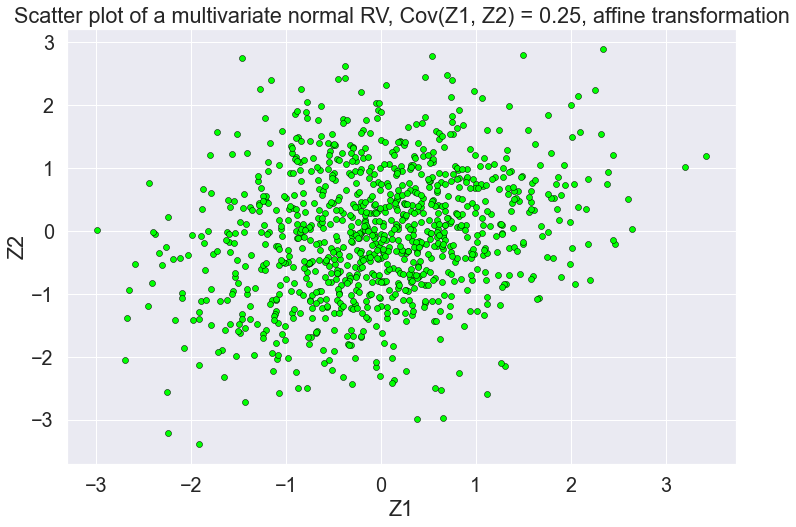

In [3]:
cov_mat = np.asarray([[1, 0.25], [0.25, 1]])

B = np.array([
    [0, 1],
    [np.sqrt(1-0.25**2), 0.25]
])

B_transpose = B.T

Y = np.random.randn(1000, 2)

# apply affine transformation
print(f"Covariance before affine transformation: {np.cov(Y[:, 0], Y[: , 1])[0][1]:.5f}")
U = np.matmul(Y, B)
print(f"Covariance after affine transformation:: {np.cov(U[:, 0], U[: , 1])[0][1]:.5f} \n\n")


plt.plot(U[:, 0], U[: , 1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Scatter plot of a multivariate normal RV, Cov(Z1, Z2) = 0.25, affine transformation')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

Way 2: Numerically. sample from a normal RV until you have a multivariate normal RV with a covariance of 0.25, as requested.

In [6]:

MAX_ITER = 1000000
print_freq = 100  # iterations


# question 4
def create_samples_multivariate(wanted_cov=0.25, size=1000):
    samples_normal = np.random.normal(loc=0, scale=1, size=size*1000)
    
    permute_half = np.random.permutation(size)
    Z1 = samples_normal[permute_half]
    
    permute_half = np.random.permutation(size)
    Z2 = list(samples_normal[permute_half])
    
    sample_cov = np.cov(Z1, np.array(Z2))[0][1]
    index_to_replace = 0
    successful_sample = 0
    for i in range(MAX_ITER):        
        temp_sample = samples_normal[np.random.randint(0, size*1000)]
        
        temp_Z2 = Z2.copy()
        temp_Z2[index_to_replace] = temp_sample
        temp_Z2 = np.array(temp_Z2)
        temp_sample_cov = np.cov(Z1, temp_Z2)[0][1]
        
            
        if (temp_sample_cov > sample_cov and sample_cov < wanted_cov) or (temp_sample_cov < sample_cov and sample_cov > wanted_cov):
            index_to_replace += 1
            successful_sample = temp_sample
            Z2 = temp_Z2
            sample_cov = temp_sample_cov
            
        if wanted_cov - 0.001 <= sample_cov <= wanted_cov + 0.001:
            print(f"\n\n\nFinished at Iteration={i}, Cov={sample_cov:.4f}, index_to_replace: {index_to_replace}")
            print(f"Last successful sample: {successful_sample:.4f}")
            break
        
        if i % print_freq == 0:
            print(f"\nIteration={i}, Cov={sample_cov:.4f}, index_to_replace: {index_to_replace}")
            print(f"Last successful sample: {successful_sample:.4f}")
            
    return Z1, Z2, sample_cov
                  
Z1, Z2, cov = create_samples_multivariate()  


Iteration=0, Cov=0.0082, index_to_replace: 0
Last successful sample: 0.0000

Iteration=100, Cov=0.0088, index_to_replace: 3
Last successful sample: -0.0004

Iteration=200, Cov=0.0102, index_to_replace: 6
Last successful sample: -1.1161

Iteration=300, Cov=0.0322, index_to_replace: 35
Last successful sample: 0.4419

Iteration=400, Cov=0.0550, index_to_replace: 60
Last successful sample: 0.1709

Iteration=500, Cov=0.0641, index_to_replace: 75
Last successful sample: -0.3155

Iteration=600, Cov=0.0715, index_to_replace: 92
Last successful sample: -0.5668

Iteration=700, Cov=0.0720, index_to_replace: 96
Last successful sample: -1.1490

Iteration=800, Cov=0.0854, index_to_replace: 117
Last successful sample: 0.7183

Iteration=900, Cov=0.0854, index_to_replace: 117
Last successful sample: 0.7183

Iteration=1000, Cov=0.0854, index_to_replace: 117
Last successful sample: 0.7183

Iteration=1100, Cov=0.0896, index_to_replace: 127
Last successful sample: -1.1306

Iteration=1200, Cov=0.1010, inde

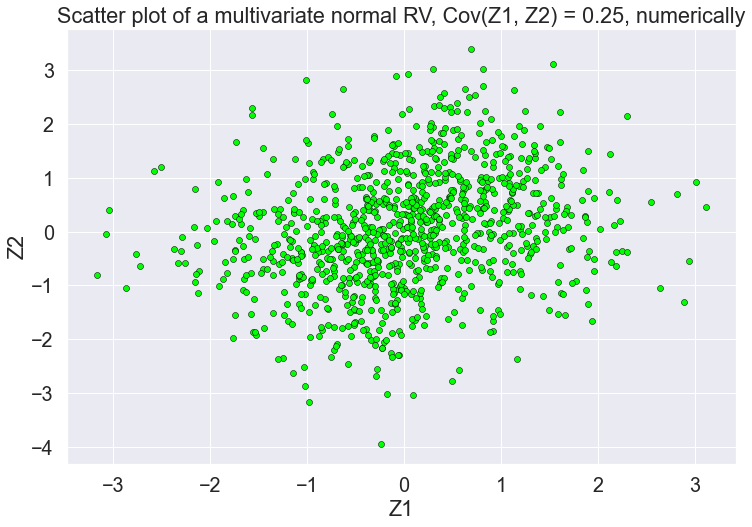

In [7]:
plt.plot(Z1, Z2, 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Scatter plot of a multivariate normal RV, Cov(Z1, Z2) = 0.25, numerically')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

Let's try with numpy built-in function as well:

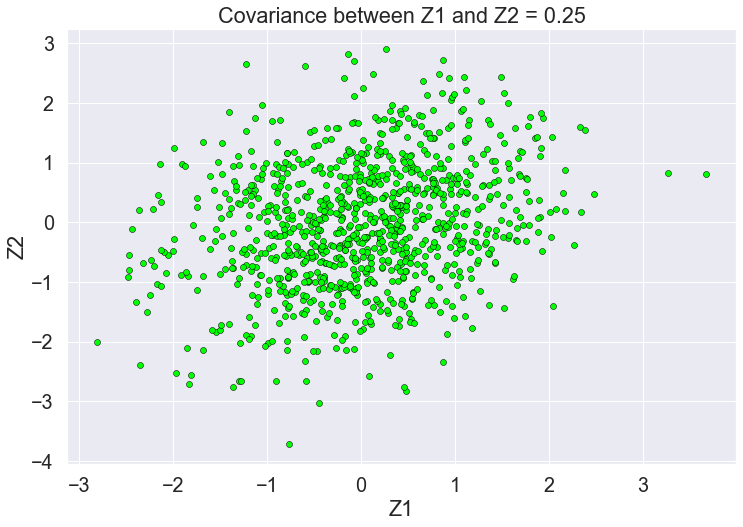

In [8]:
SIZE = 1000
MEAN = np.array([0, 0])
COV = [
    [1, 0.25],
    [0.25, 1]
]
samples_multivariate = np.random.multivariate_normal(mean=MEAN, cov=COV, size=SIZE)


plt.plot(samples_multivariate[:,0], samples_multivariate[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between Z1 and Z2 = 0.25')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

### Section 5

#### A

In [9]:
n = 1000

cov_inv = np.linalg.inv(COV)
cov_det_abs = abs(np.linalg.det(COV))
func = 1 / (2 * np.pi * np.sqrt(cov_det_abs))

x_y_values = list()
x_range = [0, 1]

dx = (1-0) / n
dy = 1 / n * (2*x_range[1] - 2*x_range[0])

for x_index in range(n+1):
    x = x_range[0] + dx * x_index

    y_range = 2 * int(x / dy)
    for y_index in range(y_range + 1):
        y = dy * y_index
        x_y_values.append((x, y))


x_y_values = np.array(x_y_values)

pdfs = func * np.exp( -0.5 * (np.matmul(x_y_values, cov_inv) * x_y_values).sum(axis=1) )
pdfs_sum = pdfs.sum() * dx * dy

print(f"By evaluating the integral over the Gaussian density function, the probability is : {100*pdfs_sum:.2f}%")

By evaluating the integral over the Gaussian density function, the probability is : 10.81%


#### B

In [10]:
x1 = U[: , 0]
x2 = U[: , 1]

indices = np.where( (x1 >= 0) & (x1 <= 1) )
filtered_x1, filtered_x2 = x1[indices], x2[indices]

indices2 = np.where( (filtered_x2 >= 0) & (filtered_x2 < 2*filtered_x1) )
filtered_x1, filtered_x2 = filtered_x1[indices2], filtered_x2[indices2]

percent = len(filtered_x1) / 1000

print(f"There are {len(filtered_x1)} values that satisfy both conditions in A")
print(f"They make up for {100*percent:.2f}%. Which is approxiamtly the integral as well")


There are 102 values that satisfy both conditions in A
They make up for 10.20%. Which is approxiamtly the integral as well


<hr>

## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

### Section 1

In [11]:
MEAN = np.array([1, 2, 3])
COV = np.array([
    [4, 1, 3],
    [1, 2, 3],
    [3, 3, 8]
])

sig_x, sig_y, sig_z = np.sqrt(4), np.sqrt(2), np.sqrt(8)
rho_x_y = 1 / 4 / 2
rho_x_z = 3 / 8 / 4
rho_y_z = 3 / 8 / 2



We know that when $(X, Y)^\top$ has a multivariate normal distribution, and the variance matrix of $(X, Y)^\top$ is invertible, we can use the conditional density functions

In [12]:
# check if the matrix is invertible:

COV_X_Y = np.array([
    [4, 1],
    [1, 2]
])

np.linalg.det(COV_X_Y)

6.999999999999999

The detarminant of this matrix exists and is 7, so in order to get the wanted conditional distribution, we can use the conditional density functions:
</br>
$$
f_{X|Y}(x|y) := \frac{f_{X,Y}(x,y) }{f_Y(y)}.
$$
</br>
and in our case:
$$
f_{X|Y}(x|y=1) := \frac{f_{X,Y}(x,y) }{f_Y(1)}.
$$

<hr>

In order to get the values of the distibution, we'll use the fact mentioned in class (without proof) that the conditional distribution of $X | Y=y$ is normal hence we only need to find the mean and the variance of this distribution:

We know that $X|Y=1$ is a normal RV, with:
</br>
$\mu$:  
$E[X|Y = 1] = 1 + 1 \cdot \frac{1}{2} \cdot (1 - 2) = 0.5$

</br>

and with $\sigma^2$:  
$Var[X|Y = 1] = 4 - 1 \cdot \frac{1}{2} \cdot 1 = 3.5$

So, The RV $X|Y = 1 \sim \Ncal(0.5, 3.5)$


</br>
We can also esitmate numerically the distibutions, using samples from the nultivariate normal distribution and plot the histogram, which represents the pdf of the wanted distribution.

We do that by simply taking all the values that are "in the limit" of the corresponding RVs. For example: for Y = 1 --> 0.99 < Y < 1.01

Using samples:

In [13]:
SIZE = 1000000
MEAN = np.array([1, 2, 3])
COV = [
    [4, 1, 3],
    [1, 2, 3],
    [3, 3, 8]
]
samples = np.random.multivariate_normal(mean=MEAN, cov=COV, size=SIZE)
x, y, z = samples[: , 0], samples[: , 1], samples[: , 2]



The mean of the distibution: 0.4756, variance: 3.4852




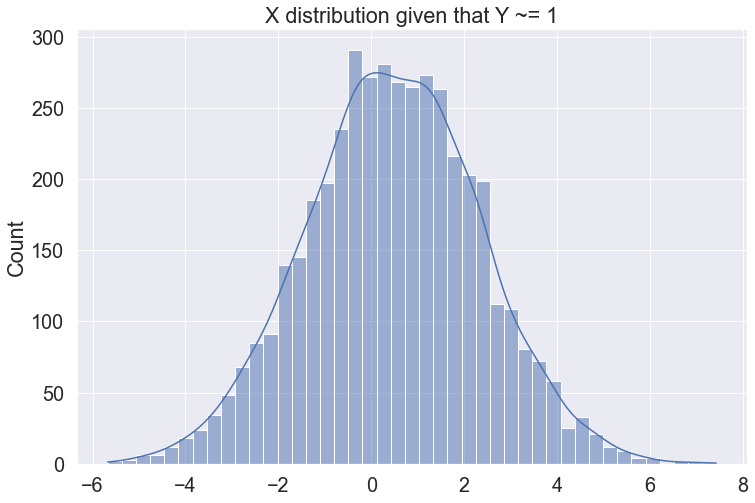

In [14]:
y_is_1_indices = np.where( (y > 0.99) & (y < 1.01) )
x_values = x[y_is_1_indices]

sns.histplot(x_values, kde=True)
plt.title("X distribution given that Y ~= 1")

print(f"\n\nThe mean of the distibution: {x_values.mean():.4f}, variance: {x_values.std()**2:.4f}\n\n")


### Section 2

We'll use the same 2 ways:


The same way as above, we know that the ditsribution of $X,Y|Z$ is a multivariate normal RV, with:
</br>
$\mu$:  
</br>

$
E [ [X, Y] | Z=1 ]  
= 
[1, 2] + 
[3, 3] \cdot \frac{1}{8} (1-3)
= 
[0.25, 1.25]
$

</br>

and with $\sigma^2$: 
</br>

$
Var [ [X, Y] | Z=1 ]  
= 
\begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix} -
\begin{bmatrix} 3 \\ 3 \end{bmatrix} \frac{1}{8} \cdot [3, 3] 
=
\begin{bmatrix} 2.875 & -0.125 \\ -0.125 & 0.875 \end{bmatrix}
$

So, The multivairate normal RV 
</br>
$[ [X, Y] | Z=1 ] 
\sim 
\Ncal
\left(
\begin{bmatrix} 0.25 \\ 1.25 \end{bmatrix}, 
\begin{bmatrix} 2.875 & -0.125 \\ -0.125 & 0.875 \end{bmatrix}
\right)
$

</br>
</br>

Using samples:

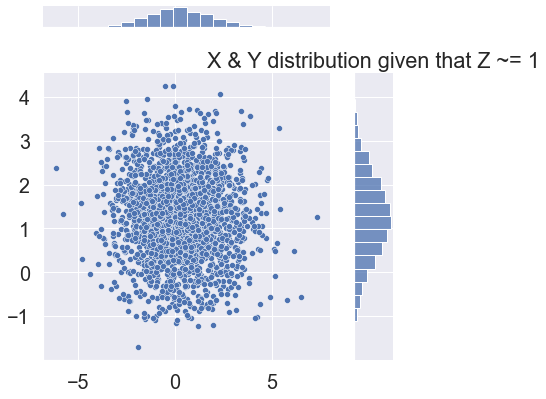



The mean of the distibution: 
 x: 0.2686, 
 y: 1.2515, 

 cov matrix: 
 [[ 2.87195335 -0.09071644]
 [-0.09071644  0.89437028]]




In [15]:
z_is_1_indices = np.where( (z > 0.99) & (z < 1.01) )

x_values = x[z_is_1_indices]
y_values = y[z_is_1_indices]

plot = sns.jointplot(x=x_values, y=y_values, marginal_kws=dict(bins=20))
plt.title("X & Y distribution given that Z ~= 1")
plot.fig.tight_layout()
plot.fig.subplots_adjust()
plt.xlabel("X")
plt.xlabel("Y")
plt.show()

print(f"\n\nThe mean of the distibution: \n x: {x_values.mean():.4f}, \n y: {y_values.mean():.4f}, \n\n cov matrix: \n {np.cov(x_values, y_values)}\n\n")



### Section 3

We'll use the same 2 ways:


The same way as above, we know that the ditsribution of $X,Y|Z$ is a multivariate normal RV, with:
</br>
$\mu$:  
</br> 
$
E [ Y |  X=3, Z=2 ]  
= 
2 + 
[1, 3]
\begin{bmatrix} 4 & 3 \\ 3 & 8 \end{bmatrix}^{-1}
[\begin{bmatrix} 3 \\ 2 \end{bmatrix} - \begin{bmatrix} 1 \\ 3 \end{bmatrix}]
=
2 + \frac{1}{23}(-11) 
= 
1.52
$

</br>

and with $\sigma^2$: 
</br>
$
Var [ Y |  X=3, Z=2 ]  
= 
2 -
[1, 3] \cdot
\begin{bmatrix} 4 & 3 \\ 3 & 8 \end{bmatrix}^{-1}
\begin{bmatrix} 1 \\ 3 \end{bmatrix}
=
2-\frac{1}{23} \cdot 26
=
0.87
$

So, the normal RV is:
</br>
$Y|X=3,Z=2 \sim \Ncal(\mu=1.52, \sigma^2 = 0.87)$

</br>
</br>

Using samples:



The mean of the distibution: 1.5989, variance: 1.0075




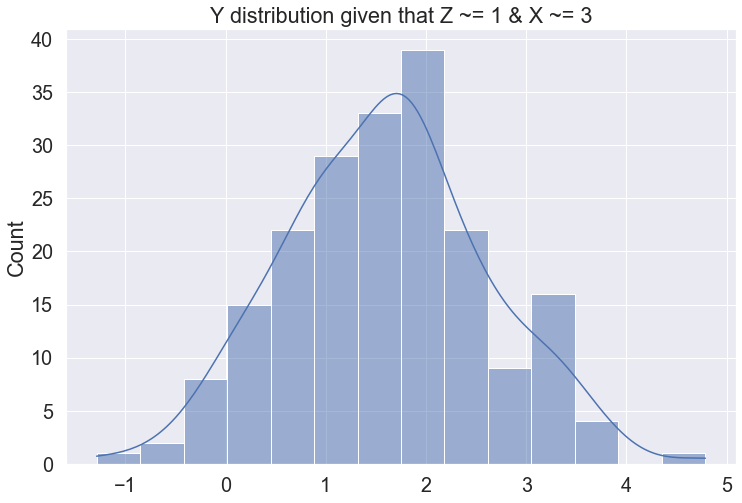

In [16]:
z_is_2_and_x_is_3_indices = np.where( (z > 1.99) & (z < 2.01) & (x > 2.99) & (z < 3.01))
y_values = y[z_is_2_and_x_is_3_indices]

sns.histplot(y_values, kde=True)
plt.title("Y distribution given that Z ~= 1 & X ~= 3")

print(f"\n\nThe mean of the distibution: {y_values.mean():.4f}, variance: {y_values.std()**2:.4f}\n\n")


### Section 4

In section 3 we showed that $Y|X=3,Z=2 \sim \Ncal(\mu=1.52, \sigma^2 = 0.87)$

From that, we can simply calculate the probability:  
$Pr(-1 \leq Y \leq 1 |X=3,Z=2) = CDF(1) - CDF(-1)$

In [17]:
from scipy.stats import norm

Y = norm(loc=1.52, scale=np.sqrt(0.87))
res = Y.cdf(1) - Y.cdf(-1)

print(f"P(-1 <= Y <= 1) = {res*100:.2f}%")

P(-1 <= Y <= 1) = 28.51%


Using samples:

In [18]:
z_is_2_and_x_is_3_indices = np.where( (z > 1.99) & (z < 2.01) & (x > 2.99) & (z < 3.01))
y_filtered = y[z_is_2_and_x_is_3_indices]
y_filtered_in_range = y_filtered[np.where( (y_filtered > -1) & (y_filtered < 1) )]

print(f"The probability is: {len(y_filtered_in_range) / len(y_filtered) * 100:.2f}%")
                                 

The probability is: 28.36%


<hr>

## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


### Answers

1. 

We know that $\hat{\beta} = (Z{^\top}Z)^{-1}Z{^\top}y$.
</br>
For us, $Z = (x_1,\ldots,x_n)^\top$, $y = (y_1,\ldots,y_n)^\top$.
</br>
Therefore, 
$$
\hat{\beta} = [(x_1,\ldots,x_n) \cdot (x_1,\ldots,x_n)^\top]^{-1} \cdot (y_1,\ldots,y_n)^\top
$$

2.


* $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = \sum_{i=1}^n \hat{\beta}x_i \cdot \hat{\epsilon}_i =  \hat{\beta} \sum_{i=1}^n x_i \cdot \hat{\epsilon}_i$

When we calculated $\hat{\beta}$ we derived $\sum_{i=1}^n y_i - \beta x_i - \epsilon$ by $\beta$ and we remember that $\sum_{i=1}^n x_i \cdot \hat{\epsilon}_i = 0$. 
</br>
-->
$\hat{\beta} \sum_{i=1}^n x_i \cdot \hat{\epsilon}_i = \hat{\beta} \cdot 0 = 0$ 

</br>

* $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
Since $\|x+y\|^2 = \|x\|^2 + \|y\|^2$, we can plug in $\|\hat{\epsilon}\|^2 = \|y_i - \hat{y}_i\|^2$ 



#TODO

3.

* We know that $cov(\hat{\epsilon}, \hat{y}) = 0$, so:
$$ [ \hat{\epsilon}, \hat{y}]^\top \sim \Ncal[(0,Z\hat{\beta})^\top, \begin{bmatrix} 1 & 0 \\
0 & \sigma^2
\end{bmatrix}]
$$

</br>

* We know that  $ cov(\hat{y},\hat{\beta}) = cov(x^\top \hat{\beta}, \hat{\beta}) = cov(\hat{\beta}, \hat{\beta}) x = var( \hat{\beta}) x$

</br>

We also know that $var(\hat{\beta}) = \sigma^2(x^Tx)^-1 $, and $\sigma^2 = 1$ 
</br>
-->
$ cov(\hat{y},\hat{\beta}) = (x^Tx)^-1 x $

</br>
-->
$[\hat{y}~~ \hat{\beta}]^\top \sim \Ncal[(Z\beta, \beta)^\top, \begin{bmatrix} \sigma^2I_n & (x^Tx)^-1 x \\
((x^Tx)^-1 x)^T & (x^Tx)^-1
\end{bmatrix}]
$

4.

We start with the fact that $\epsilon_i \sim N(0, 1)$ 
</br>
We'll also note that $\hat{\epsilon}_i \sim N(0, I-H)$.
</br>
If $I-H > 1$, then $Pr( \|\hat{\epsilon}\|_{\infty} > 2) > Pr(\|\epsilon\|_{\infty}  > 2)$ 
</br>
According to the law of big numbers.
</br>
(on a personal note: it makes sense that the estimate of the true $\beta$ will result in higher (in absolute values) residual than the true ones, since the true ones will have lower residuals, by definition. (This is exactly what we try to minimize)

<hr>

## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [205]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !mkdir house-prices
# !unzip house-prices-advanced-regression-techniques.zip -d house-prices/

/bin/bash: kaggle: command not found
mkdir: house-prices: File exists
unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [19]:
import pandas as pd
#data_raw = pd.read_csv("house-prices/train.csv")
data_raw = pd.read_csv("/Users/eyalmichaeli/Desktop/School/Master's/IDC_masters/semester_2/stat/Exercises/Eyal/EX1/house-prices/train.csv")

data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [20]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.

In [21]:
df = data.copy()

In [22]:
y = df['SalePrice'].values
X = df[feat_set1]
Z = np.c_[np.ones_like(y), X]

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat = np.dot(A, y)

print(f"beta_hat vector:")
print(*beta_hat, sep="\n") 

beta_hat vector:
-930539.0921944631
4.144437543826334
144.32511575431795
271.6254686952227
2796.7315861697834
15624.230009733916
35.07635950621925
42.143165184290524
25411.429359990234


2. Find $R^2$ of this model.

This is the **explained** variance:
$$
R^2 := 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

In [23]:
y_hat = np.matmul(Z, beta_hat)
y_mean = np.mean(y)

r_squared = 1 - np.sum((y_hat - y)**2) / np.sum((y - y_mean)**2)

print(r"R^2 =", f"{r_squared:.3f}")

R^2 = 0.789


Another way to get both $\hat{\beta}, R^2$ is using statmodles library:

In [24]:
import statsmodels.formula.api as smf

model = smf.ols(formula="SalePrice ~ LotArea + YearBuilt + YrSold + GarageCars + FullBath + TotalBsmtSF + GarageArea + OverallQual", data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     621.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:12:34   Log-Likelihood:                -15823.
No. Observations:                1338   AIC:                         3.166e+04
Df Residuals:                    1329   BIC:                         3.171e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.305e+05   1.38e+06     -0.673      0.501   -3.64e+06    1.78e+06
LotArea         4.1444      0.343     12.082      0.000       3.471       4.817
YearBuilt     144.3251     40.873      3.531      0.000      64.142     224.508
YrSold        271.6255    687.892      0.395      0.693   -1077.848    1621.098
GarageCars   2796.7316   2816.908      0.993      0.321   -2729.339    8322.802
FullBath     1.562e+04   2127.566      7.344      0.000    1.15e+04    1.98e+04
TotalBsmtSF    35.0764      2.852     12.300      0.000      29.482      40.671
GarageArea     42.1432      9.747      4.324      0.000      23.023      61.264
OverallQual  2.541e+04   1002.464     25.349      0.000    2.34e+04    2.74e+04
==============================================================================
Omnibus:                      395.128   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2859.992
Skew:                           1.173   Prob(JB):                         0.00
Kurtosis:                       9.768   Cond. No.                     1.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 

In [26]:
residuals = y-y_hat
n = len(y)
p = len(feat_set1) + 1  # +1 for (ones vector)

s = np.sqrt(np.sum( residuals**2 )) / np.sqrt(n-p)

p_values = np.array([])
for i, beta in enumerate(beta_hat):
    c = [0] * 9
    c[i] = 1
    c_arr = np.array(c)
        
    numerator = beta - 0  # our hypothesis is that Beta_j = 0
    denominator = s * np.sqrt( c_arr.T @ np.linalg.inv(np.dot(Z.T, Z)) @ c_arr ) 
    
    t = numerator / denominator
    
    p_value = 2*stats.t.sf(t, df=n-p)
    p_values = np.append(p_values, p_value)
    
    

4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)

In [27]:
significant_p_vals = [p_value for p_value in p_values if (p_value > 0.975 or p_value < 0.025) and p_value < 1]

indices_significant = np.where( ( (p_values > 0.975) | (p_values < 0.025) ) & (p_values < 1) )
feat_set1.insert(0, "Intercept")

print("Printing all significant features")
for col, p_val in zip(np.array(feat_set1)[indices_significant], significant_p_vals):
    print(f"For feature: {col}, this is the p-value: {p_val:.5f}")


Printing all significant features
For feature: LotArea, this is the p-value: 0.00000
For feature: YearBuilt, this is the p-value: 0.00043
For feature: FullBath, this is the p-value: 0.00000
For feature: TotalBsmtSF, this is the p-value: 0.00000
For feature: GarageArea, this is the p-value: 0.00002
For feature: OverallQual, this is the p-value: 0.00000


5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

In [28]:
feat_set_sub = ['LotArea',  'YearBuilt', 'YrSold']

df1 = data.copy()

y = df1['SalePrice'].values
X = df1[feat_set_sub]
Z = np.c_[np.ones_like(y), X]

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat1 = np.dot(A, y)

print(f"beta_hat vector:")
print(*beta_hat1, sep="\n") 

beta_hat vector:
-2544714.279752834
9.07241877451654
1299.5623138760566
38.16257962967529


In [29]:
y_hat1 = np.matmul(Z, beta_hat1)
y_mean = np.mean(y)

ss = np.sum( (y-y_mean)**2 )

print(f"Model's sum of squares: {ss:.2f}")

Model's sum of squares: 6941691638598.84


In [30]:

r_squared1 = 1 - np.sum((y_hat1 - y)**2) / np.sum((y - y_mean)**2)

print(r"R^2 =", f"{r_squared1:.3f}")

R^2 = 0.476


Another way to get both $\hat{\beta}, R^2$ is using statmodles library:

In [31]:
import statsmodels.formula.api as smf

model = smf.ols(formula="SalePrice ~ LotArea + YearBuilt + YrSold", data=df1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     404.0
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          1.16e-186
Time:                        19:13:11   Log-Likelihood:                -16431.
No. Observations:                1338   AIC:                         3.287e+04
Df Residuals:                    1334   BIC:                         3.289e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.545e+06   2.17e+06     -1.171      0.242   -6.81e+06    1.72e+06
LotArea        9.0724      0.490     18.502      0.000       8.110      10.034
YearBuilt   1299.5623     47.229     27.516      0.000    1206.910    1392.214
YrSold        38.1626   1081.178      0.035      0.972   -2082.832    2159.157
==============================================================================
Omnibus:                      406.827   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.136
Skew:                           1.452   Prob(JB):                         0.00
Kurtosis:                       7.239   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
ss_full = np.sum( (y-y_hat) **2 )
ss_sub = np.sum( (y-y_hat1) **2 )

assert ss_full < ss_sub

p = len(feat_set1) + 1
q = len(feat_set_sub) + 1
n = len(y)

f = ( (n-p) * (ss_sub - ss_full) ) / ( (p-q) * ss_full )

p_value = 2*stats.f.sf(f, dfn=p-q, dfd=n-p)

print(f"p_value of the F-test: {p_value}")
print("\nTherefore, it seems that the more complex model is significantly better and than the current (less features) model.")
print("This model doesn't provide a valid representation of the data compared to the original larger one.")
      

p_value of the F-test: 7.417303547955673e-258

Therefore, it seems that the more complex model is significantly better and than the current (less features) model.
This model doesn't provide a valid representation of the data compared to the original larger one.


<hr>
<hr>